<a href="https://colab.research.google.com/github/Storkluc/Python/blob/master/Trabalho_final_parte_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Trabalho integrado Ciência de dados e Python 03

###Escalanomento sem vazamento de dados

In [17]:
import io
import pandas as pd
import numpy as np


from google.colab import files
from pandas import read_csv
from numpy import mean
from numpy import std
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import LeaveOneOut
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from matplotlib import pyplot


In [4]:
uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [5]:
df_discretizazao = pd.read_csv(io.BytesIO(uploaded['Churn_Modelling.csv']), sep=';', encoding='latin1')

In [ ]:
df_discretizazao.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
# Eliminando dados desnecessários.
df_discretizazao = df_discretizazao.drop(['Geography','Gender'], axis=1)

In [ ]:
df_discretizazao.head()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0


###Hold-out

In [ ]:
#Separando os resultados do dataset.
feat = df_discretizazao.drop(columns=['Exited'], axis=1)
label = df_discretizazao['Exited']

In [ ]:
# Dividindo os dados em Treinamento e teste.
X_train, X_test, y_train, y_test = train_test_split(feat, label, test_size=0.33)

In [ ]:
# Criando um escalonador.
scaler = MinMaxScaler()

In [ ]:
# Ajustando os dados de treinamento.
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
# Escalanomento dos dados de treinamento.
X_train = scaler.transform(X_train)

In [ ]:
# Escalanomento dos dados de teste.
X_test = scaler.transform(X_test)

In [ ]:
# Realizando o ajuste do modelo.
model = LogisticRegression()
model.fit(X_train, y_train)

# Avaliando  o modelo.
yhat = model.predict(X_test)

# Avaliando as previsões do modelo.
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % (accuracy*100))

Accuracy: 81.606


###Validação cruzada sem vazamento de dados

In [ ]:
# Carregando base de dados.
df_validacao = pd.read_csv(io.BytesIO(uploaded['Churn_Modelling.csv']), sep=';', encoding='latin1')

In [ ]:
# Eliminando dados desnecessários.
df_validacao = df_validacao.drop(['Geography','Gender'], axis=1)

In [ ]:
feat1 = df_discretizazao.drop(columns=['Exited'], axis=1)
label1 = df_discretizazao['Exited']

In [ ]:
x = feat1
y = label1

In [ ]:
# Criando  o pipeline.
steps = list()
steps.append(('scaler', MinMaxScaler()))
steps.append(('model', LogisticRegression()))
pipeline = Pipeline(steps=steps)

In [ ]:
# Criando o procedimento de avaliação.
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
# Avaliando o modelo usando Validação Cruzada.
scores = cross_val_score(pipeline, x, y, scoring='accuracy', cv=cv, n_jobs=1)

# Apresentano o desempenho do modelo.
print('Accuracy: %3f (%.3f)' % (mean(scores)*100, std(scores)*100))

Accuracy: 80.644761 (0.763)


###LOOCV (Leave-One-Out CV)

In [21]:
# Separando dos dados do dataset.
X = df_discretizazao.drop(columns=['Exited'], axis=1)
y = df_discretizazao['Exited']

In [22]:
# Executando o método:
cv = LeaveOneOut()
# Ajustando modelo.
model = RandomForestClassifier(random_state=1)
# Avaliando modelo.
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# Resultado.
print("Accuracy: %.3f (%.3f)" % (mean(scores), std(scores)))

Accuracy: 0.854 (0.353)


# Redução de Dados com Numpy

In [ ]:
# Carregando dados.
uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling (18).csv


In [ ]:
df_reducao = pd.read_csv(io.BytesIO(uploaded['Churn_Modelling.csv']), sep=';', encoding='latin1')

In [ ]:
df_reducao.shape

(9999, 12)

In [ ]:
# Analisando a base para verificar os valores únicos.
counts = df_reducao.nunique()

In [ ]:
# Identificando os atributos que serão eliminados da base.
to_del = [i for i,v in enumerate(counts) if v == 1]
print(to_del)

# Eliminando as instâncias inúteis.
df_reducao.drop(to_del, axis = 0 , inplace=True) # Alterou-se o axis devido a um erro acerca do axis que não encontrou [2].
print(df_reducao.shape)

[]
(9999, 12)


###Elimando dados que possuam valores únicos em menos de 1% das instâncias


In [ ]:
# Carregando base.
df_eliminated = pd.read_csv(io.BytesIO(uploaded['Churn_Modelling.csv']), sep=';', encoding='latin1')
print(df_eliminated.shape)

# Verificando o número de valores únicos para cada atributo.
unique = df_eliminated.nunique()

# Identificando os atributos que serão eliminados
delete = [i for i, v in enumerate(unique) if (float(v)/df_eliminated.shape[0]*100) < 1]

# Elimando as instâncias inúteis.
df_eliminated.drop(delete, axis=0, inplace=True) # Mesmo erro.
print(df_eliminated.shape)

(9999, 12)
(9991, 12)


##Filtros nominais e numéricos

###Chi-Quadrado

Feature 0: 3367.205628
Feature 1: 224.788541
Feature 2: 33.138819
Feature 3: 66.532865
Feature 4: 2894.229345
Feature 5: 7.256663
Feature 6: 49757.371051
Feature 7: 31.700511
Feature 8: 2.424181
Feature 9: 83.840466
Feature 10: 3469.605027


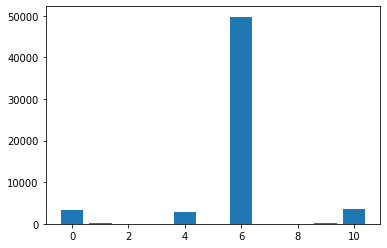

In [ ]:
# Carregando a base de dados.
def load_dataset(filename):
  data = read_csv(filename, sep=';', header=None)
  # retrive numpy array
  dataset = data.values
  # split into input(X) and output (y) variables
  X = dataset[:, :-1]
  y = dataset[:,-1]
  # format all fields as string
  X = X.astype(str)
  return X, y

# Prepara os dados de entrada.
def prepare_inputs(X_train, Xtest):
  oe = OrdinalEncoder()
  oe.fit(X_train)
  X_train_enc = oe.fit_transform(X_train)
  X_test_enc = oe.fit_transform(X_test) # Usando apenas o transform estava apresentando um erro que não consegui solucionar. Era em relação ao formato dos dados.
  return X_train_enc, X_test_enc

# Preparando as classes.
def prepare_targets(y_train, y_test):
  le = LabelEncoder()
  le.fit(y_train)
  y_train_enc = le.transform(y_train)
  y_test_enc = le.transform(y_test)
  return y_train_enc, y_test_enc

# Seleção de atributos
def select_features(X_train, y_train, X_test):
  fs = SelectKBest(score_func=chi2, k='all')
  fs.fit(X_train, y_train)
  X_train_fs = fs.transform(X_train)
  X_test_fs = fs.transform(X_test)
  return X_train_fs, X_test_fs, fs

# Carregando base de dados.
X, y = load_dataset('Churn_Modelling.csv')

# Dividindo os dados em conjuntos de treinamento e teste.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=1)

# Preparando os dados de entrada.
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)

# Preparando os dados de saída.
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

# Seleção de atributos.
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)

# Apresentando os scores dos atributos
for i in range(len(fs.scores_)):
  print('Feature %d: %f' % (i, fs.scores_[i]))

# Gráfico com scores dos atributos.
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

Feature 0: 0.000000
Feature 1: 0.006198
Feature 2: 0.017352
Feature 3: 0.006957
Feature 4: 0.066158
Feature 5: 0.001046
Feature 6: 0.002652
Feature 7: 0.069821
Feature 8: 0.000000
Feature 9: 0.015107
Feature 10: 0.002594


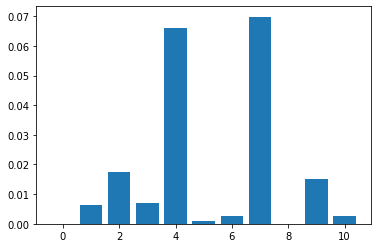

In [ ]:
# Usando o critério de Informação Mútua

# Carregando a base de dados.
def load_dataset(filename):
  data = read_csv(filename, sep=';', header=None)
  # retrive numpy array
  dataset = data.values
  # split into input(X) and output (y) variables
  X = dataset[:, :-1]
  y = dataset[:,-1]
  # format all fields as string
  X = X.astype(str)
  return X, y

# Prepara os dados de entrada.
def prepare_inputs(X_train, Xtest):
  oe = OrdinalEncoder()
  oe.fit(X_train)
  X_train_enc = oe.transform(X_train)
  X_test_enc = oe.fit_transform(X_test) # Usando apenas o transform estava apresentando um erro que não consegui solucionar. Era em relação ao formato dos dados.
  return X_train_enc, X_test_enc

# Preparando as classes.
def prepare_targets(y_train, y_test):
  le = LabelEncoder()
  le.fit(y_train)
  y_train_enc = le.transform(y_train)
  y_test_enc = le.transform(y_test)
  return y_train_enc, y_test_enc

# Seleção de atributos
def select_features(X_train, y_train, X_test):
  fs = SelectKBest(score_func=mutual_info_classif, k='all')
  fs.fit(X_train, y_train)
  X_train_fs = fs.transform(X_train)
  X_test_fs = fs.transform(X_test)
  return X_train_fs, X_test_fs, fs

# Carregando base de dados.
X, y = load_dataset('Churn_Modelling.csv')

# Dividindo os dados em conjuntos de treinamento e teste.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=1)

# Preparando os dados de entrada.
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)

# Preparando os dados de saída.
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

# Seleção de atributos.
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)

# Apresentando os scores dos atributos
for i in range(len(fs.scores_)):
  print('Feature %d: %f' % (i, fs.scores_[i]))

# Gráfico com scores dos atributos.
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

Saving Churn_Modelling4.csv to Churn_Modelling4.csv
Feature 0: 0.000000
Feature 1: 0.067802
Feature 2: 0.003181
Feature 3: 0.069247
Feature 4: 0.015967
Feature 5: 0.001703


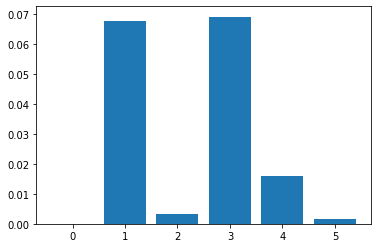

In [ ]:
# Nova análise, após retirar atributos desnecessários.
# O novo gráfico gerado diverge um pouco em relação ao anterior, porém algumas
# conecções que já existiam, se tornaram ainda mais fortes.

uploaded = files.upload()

# Carregando a base de dados.
def load_dataset(filename):
  data = read_csv(filename, sep=';', header=None)
  # retrive numpy array
  dataset = data.values
  # split into input(X) and output (y) variables
  X = dataset[:, :-1]
  y = dataset[:,-1]
  # format all fields as string
  X = X.astype(str)
  return X, y

# Prepara os dados de entrada.
def prepare_inputs(X_train, Xtest):
  oe = OrdinalEncoder()
  oe.fit(X_train)
  X_train_enc = oe.transform(X_train)
  X_test_enc = oe.fit_transform(X_test) # Usando apenas o transform estava apresentando um erro que não consegui solucionar. Era em relação ao formato dos dados.
  return X_train_enc, X_test_enc

# Preparando as classes.
def prepare_targets(y_train, y_test):
  le = LabelEncoder()
  le.fit(y_train)
  y_train_enc = le.transform(y_train)
  y_test_enc = le.transform(y_test)
  return y_train_enc, y_test_enc

# Seleção de atributos
def select_features(X_train, y_train, X_test):
  fs = SelectKBest(score_func=mutual_info_classif, k='all')
  fs.fit(X_train, y_train)
  X_train_fs = fs.transform(X_train)
  X_test_fs = fs.transform(X_test)
  return X_train_fs, X_test_fs, fs

# Carregando base de dados.
X, y = load_dataset('Churn_Modelling4.csv')

# Dividindo os dados em conjuntos de treinamento e teste.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=1)

# Preparando os dados de entrada.
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)

# Preparando os dados de saída.
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

# Seleção de atributos.
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)

# Apresentando os scores dos atributos
for i in range(len(fs.scores_)):
  print('Feature %d: %f' % (i, fs.scores_[i]))

# Gráfico com scores dos atributos.
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()


## Seleção de Atributos Filtro para Classificação - Atributos Numéricos

In [ ]:
#Carregando nova base dados baseada na anterior.
uploaded = files.upload()

Saving Churn_Modelling3.csv to Churn_Modelling3 (1).csv


Feature 0: 3.041893
Feature 1: 301.717689
Feature 2: 2.187342
Feature 3: 16.818124
Feature 4: 24.894895
Feature 5: 4.142780
Feature 6: 87.756513
Feature 7: 1.553347


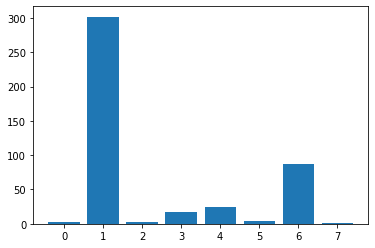

In [ ]:
# F ANOVA

# Carregando a base de dados.
def load_dataset(filename):
  data = read_csv(filename, sep=';', header=None)
  # retrive numpy array
  dataset = data.values
  # split into input(X) and output (y) variables
  X = dataset[:, :-1]
  y = dataset[:,-1]
  # format all fields as string
  X = X.astype(str)
  return X, y

# Prepara os dados de entrada.
def prepare_inputs(X_train, Xtest):
  oe = OrdinalEncoder()
  oe.fit(X_train)
  X_train_enc = oe.transform(X_train)
  X_test_enc = oe.fit_transform(X_test) # Usando apenas o transform estava apresentando um erro que não consegui solucionar. Era em relação ao formato dos dados.
  return X_train_enc, X_test_enc

# Preparando as classes.
def prepare_targets(y_train, y_test):
  le = LabelEncoder()
  le.fit(y_train)
  y_train_enc = le.transform(y_train)
  y_test_enc = le.transform(y_test)
  return y_train_enc, y_test_enc

# Seleção de atributos
def select_features(X_train, y_train, X_test):
  fs = SelectKBest(score_func=f_classif, k='all')
  fs.fit(X_train, y_train)
  X_train_fs = fs.transform(X_train)
  X_test_fs = fs.transform(X_test)
  return X_train_fs, X_test_fs, fs

# Carregando base de dados.
X, y = load_dataset('Churn_Modelling3.csv')

# Dividindo os dados em conjuntos de treinamento e teste.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=1)

# Preparando os dados de entrada.
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)

# Preparando os dados de saída.
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

# Seleção de atributos.
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)

# Apresentando os scores dos atributos
for i in range(len(fs.scores_)):
  print('Feature %d: %f' % (i, fs.scores_[i]))

# Gráfico com scores dos atributos.
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

Feature 0: 0.000000
Feature 1: 0.067208
Feature 2: 0.000000
Feature 3: 0.003979
Feature 4: 0.065246
Feature 5: 0.009795
Feature 6: 0.020613
Feature 7: 0.000467


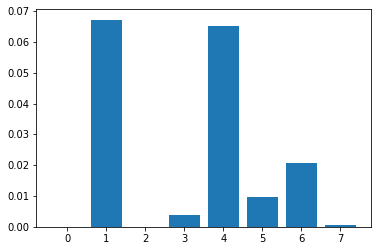

In [ ]:
# Usando o critério de Informação Mútua

# Carregando a base de dados.
def load_dataset(filename):
  data = read_csv(filename, sep=';', header=None)
  # retrive numpy array
  dataset = data.values
  # split into input(X) and output (y) variables
  X = dataset[:, :-1]
  y = dataset[:,-1]
  # format all fields as string
  X = X.astype(str)
  return X, y

# Prepara os dados de entrada.
def prepare_inputs(X_train, Xtest):
  oe = OrdinalEncoder()
  oe.fit(X_train)
  X_train_enc = oe.transform(X_train)
  X_test_enc = oe.fit_transform(X_test) # Usando apenas o transform estava apresentando um erro que não consegui solucionar. Era em relação ao formato dos dados.
  return X_train_enc, X_test_enc

# Preparando as classes.
def prepare_targets(y_train, y_test):
  le = LabelEncoder()
  le.fit(y_train)
  y_train_enc = le.transform(y_train)
  y_test_enc = le.transform(y_test)
  return y_train_enc, y_test_enc

# Seleção de atributos
def select_features(X_train, y_train, X_test):
  fs = SelectKBest(score_func=mutual_info_classif, k='all')
  fs.fit(X_train, y_train)
  X_train_fs = fs.transform(X_train)
  X_test_fs = fs.transform(X_test)
  return X_train_fs, X_test_fs, fs

# Carregando base de dados.
X, y = load_dataset('Churn_Modelling3.csv')

# Dividindo os dados em conjuntos de treinamento e teste.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=1)

# Preparando os dados de entrada.
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)

# Preparando os dados de saída.
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

# Seleção de atributos.
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)

# Apresentando os scores dos atributos
for i in range(len(fs.scores_)):
  print('Feature %d: %f' % (i, fs.scores_[i]))

# Gráfico com scores dos atributos.
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()